In [2]:
#importing the necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
#uploading the file

file = 'Apprentice_Chef_Dataset.xlsx'

dt = pd.read_excel(file)

dt.head()


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


In [4]:
#splitting emails

email_list = []

for index, col in dt.iterrows():
    
    # splitting email domain at '@'
    split_email = dt.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    email_list.append(split_email)
    

# converting placeholder_lst into a DataFrame 
domains = pd.DataFrame(email_list)

domains.columns = ['email_name', 'personal_email_domain']

# concatenating personal_email_domain with friends DataFrame
dt = pd.concat([dt, domains.loc[: , 'personal_email_domain']],
                   axis = 1)


dt.head()

    

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,personal_email_domain
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,1,0,90,165.8,6,1,3,11,0,passport.com
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,1,0,90,150.5,4,1,3,13,90,jnj.com
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,80,99.6,3,0,3,12,0,gmail.com
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,0,0,90,125.0,3,0,3,13,0,ibm.com
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,1,0,90,135.3,3,1,3,13,253,goldmansacs.com


In [5]:
#Counting the number of emails
dt.loc[: ,'personal_email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
merck.com            28
jnj.com              28
cocacola.com         28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
caterpillar.com      22
pg.com               22
verizon.com          22
mmm.com              22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
intel.com            17
homedepot.com        17
Name: personal_email_domain, dtype: int64

In [6]:
#making lists of email groups

professional_email_domains = ['@mmm.com',
                                '@amex.com',
                                '@apple.com',
                                '@boeing.com',
                                '@caterpillar.com',
                                '@chevron.com',
                                '@cisco.com',
                                '@cocacola.com',
                                '@disney.com',
                                '@dupont.com',
                                '@exxon.com',
                                '@ge.org',
                                '@goldmansacs.com',
                                '@homedepot.com',
                                '@ibm.com',
                                '@intel.com',
                                '@jnj.com',
                                '@jpmorgan.com',
                                '@mcdonalds.com',
                                '@merck.com',
                                '@microsoft.com',
                                '@nike.com',
                                '@pfizer.com',
                                '@pg.com',
                                '@travelers.com',
                                '@unitedtech.com',
                                '@unitedhealth.com',
                                '@verizon.com',
                                '@visa.com',
                                '@walmart.com']

personal_email_domains = ['@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']

junk_email_domains = ['@me.com',
                        '@aol.com',
                        '@hotmail.com',
                        '@live.com',
                        '@msn.com',
                        '@passport.com']

#grouping_emails
email_groups = []

for i in dt.loc[ : , 'personal_email_domain']:
    if '@' + i in professional_email_domains:
        email_groups.append('professional')
    
    elif '@' + i in personal_email_domains:
        email_groups.append ('personal')
    
    elif '@' + i in junk_email_domains:
        email_groups.append ('junk')
    
    else:
        email_groups.append('unknown')
        
dt['email_groups'] = pd.Series(email_groups)

#Saving New Dataset to Excel
dt.to_excel('Apprentice_ND.xlsx')

In [7]:

chef = pd.read_excel('Apprentice_ND.xlsx')
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 32 columns):
Unnamed: 0                      1946 non-null int64
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
P

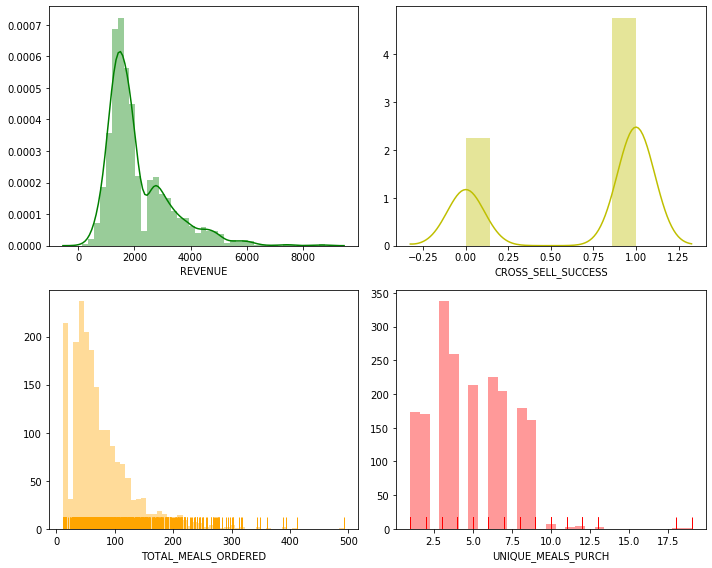

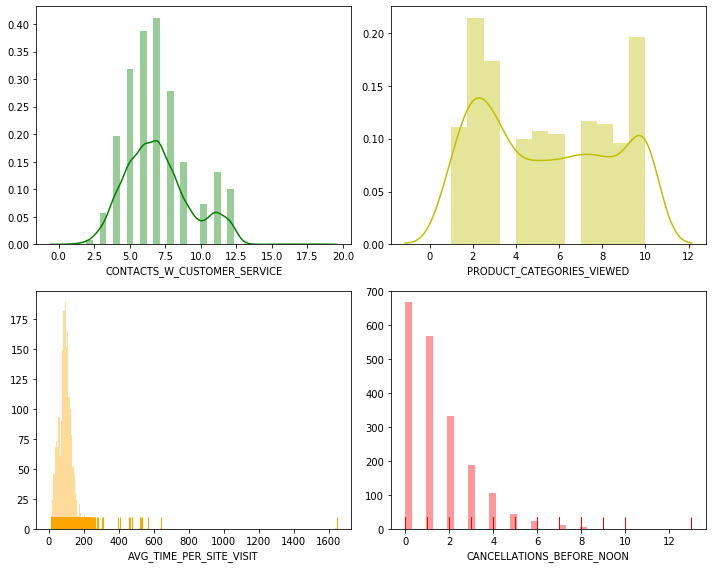

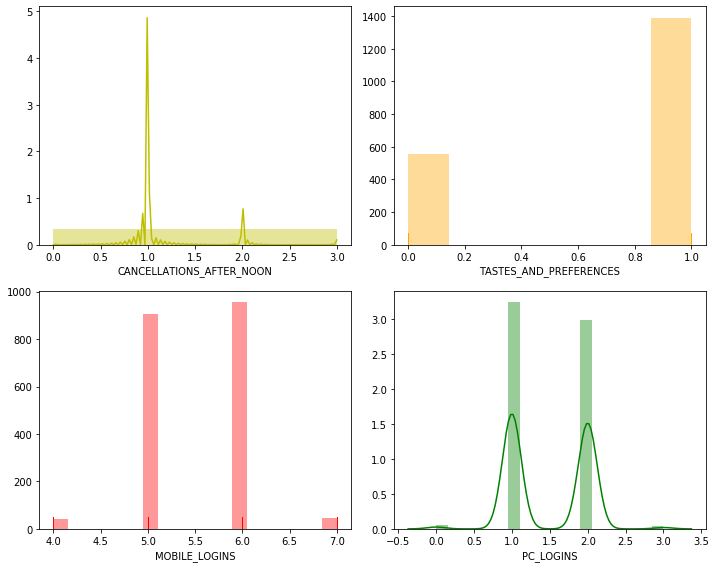

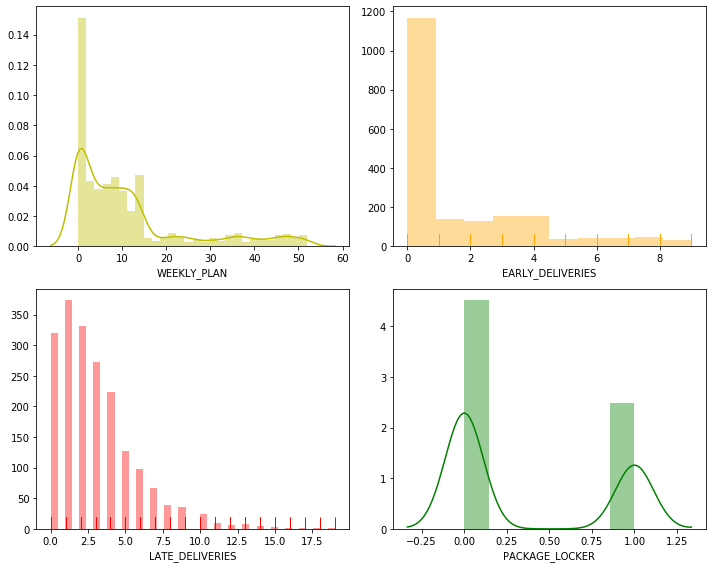

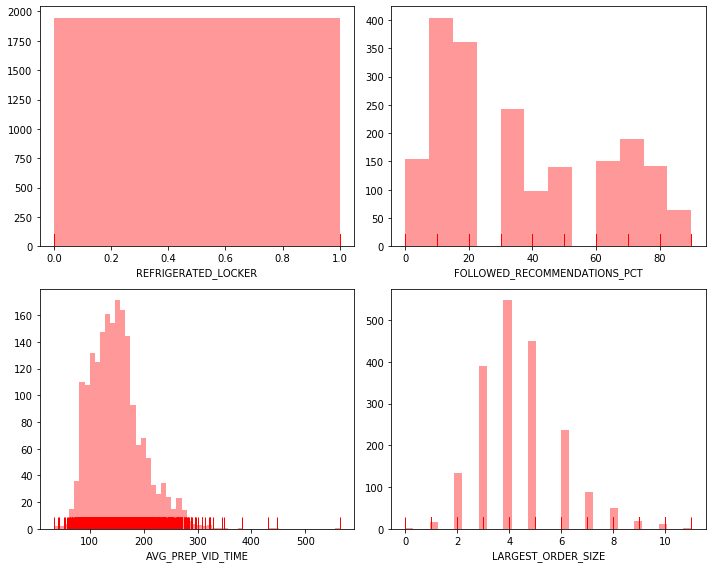

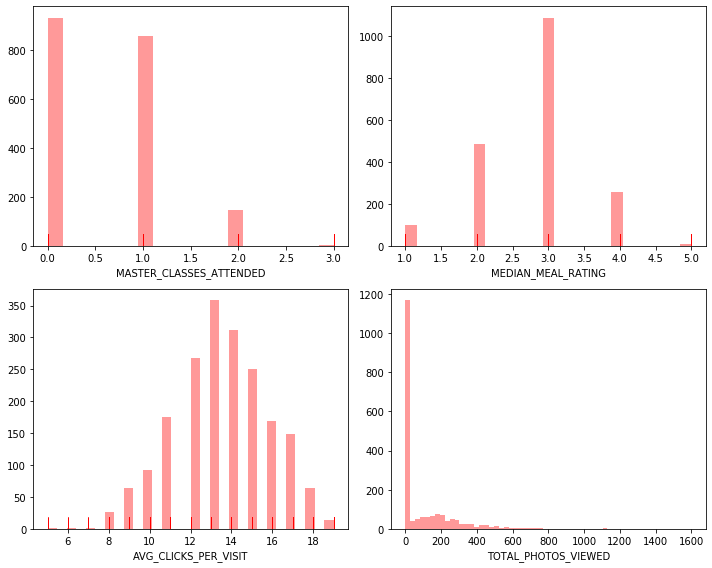

In [8]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################
plt.subplot(2, 2, 4)
sns.distplot(chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE_MEALS_PURCH')
plt.tight_layout()
plt.savefig('CHEF Data Histograms 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Chef Data Histograms 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Chef Data Histograms 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(chef['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Chef Data Histograms 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Chef Data Histograms 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(chef['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')

plt.subplot(2, 2, 3)
sns.distplot(chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = False,
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.savefig('Chef Data Histograms 6 of 6.png')
# setting outlier thresholdsplt.show()

In [9]:
# setting outlier thresholds

REVENUE_split = 2400 
TOTAL_MEALS_ORDERED_split =200
UNIQUE_MEALS_PURCH_split = 10.0
CONTACTS_W_CUSTOMER_SERVICE_split = 10.0
AVG_TIME_PER_SITE_VISIT_split = 200
CANCELLATIONS_BEFORE_NOON_split = 5
CANCELLATIONS_AFTER_NOON_split_low = 0.5
CANCELLATIONS_AFTER_NOON_split_high = 1.5
MOBILE_LOGINS_split_low = 4.9
MOBILE_LOGINS_split_high = 6.1
PC_LOGINS_split_low = 0.5
PC_LOGINS_split_high = 2.4
WEEKLY_PLAN_split_low = 0
WEEKLY_PLAN_split_high = 17
EARLY_DELIVERIES_split = 1
LATE_DELIVERIES_split = 10
PACKAGE_LOCKER_split_low = 0.0
PACKAGE_LOCKER_split_high = 1.0
AVG_PREP_VID_TIME_split = 250
LARGEST_ORDER_SIZE_split_low = 2 
LARGEST_ORDER_SIZE_split_high = 7
MASTER_CLASSES_ATTENDED_split = 2
MEDIAN_MEAL_RATING_split = 4
AVG_CLICKS_PER_VISIT_split_low = 8
TOTAL_PHOTOS_VIEWED_split_low = 0
TOTAL_PHOTOS_VIEWED_split_high = 400

In [10]:
##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

#Revenue
chef['out_revenue'] = 0

revenue_condition_split = chef.loc[: , 'out_revenue'][chef['REVENUE']>REVENUE_split]
chef['out_revenue'].replace(to_replace = revenue_condition_split,
                            value = 1,
                           inplace = True)

#Total meals ordered
chef['out_meals_ordered'] = 0

total_meals_ordered_hi_split = chef.loc[: ,'out_meals_ordered'][chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_split]
chef['out_meals_ordered'].replace(to_replace = total_meals_ordered_hi_split,
                                   value = 1,
                                    inplace = True)

#Unique Meals
chef['out_unique_meals'] = 0

unique_meals_condition = chef.loc[: , 'out_unique_meals'][chef['UNIQUE_MEALS_PURCH'] >= UNIQUE_MEALS_PURCH_split]
chef['out_unique_meals'].replace(to_replace = unique_meals_condition,
                                value = 1,
                                inplace = True)

#Contact with Customer Service
chef['out_customer_service_contact'] = 0

customer_service_contact_condition = chef.loc[: , 'out_customer_service_contact'][chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_split]

chef['out_customer_service_contact'].replace(to_replace = customer_service_contact_condition,
                                value = 1,
                                inplace = True)

#Avg time on site
AVG_TIME_PER_SITE_VISIT_split = 200

chef['out_avg_time_site_visit'] = 0
avg_time_condition_split = chef.loc[: , 'out_avg_time_site_visit'][chef['AVG_TIME_PER_SITE_VISIT']>AVG_TIME_PER_SITE_VISIT_split]
chef['out_avg_time_site_visit'].replace(to_replace = avg_time_condition_split,
                            value = 1,
                           inplace = True)


#cancellations before noon
CANCELLATIONS_BEFORE_NOON_split = 5

chef['out_canc_before_noon'] = 0

out_canc_condition_split = chef.loc[: , 'out_canc_before_noon'][chef['CANCELLATIONS_BEFORE_NOON']>CANCELLATIONS_BEFORE_NOON_split]
chef['out_canc_before_noon'].replace(to_replace = out_canc_condition_split,
                            value = 1,
                           inplace = True)

#cancellation after noon
CANCELLATIONS_AFTER_NOON_split_low = 0.5
CANCELLATIONS_AFTER_NOON_split_high = 1.5

chef['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_split_high]
condition_lo = chef.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] < CANCELLATIONS_AFTER_NOON_split_low]

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



#mobile logins
MOBILE_LOGINS_split_low = 4.9
MOBILE_LOGINS_split_high = 6.1

chef['out_MOBILE_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] > MOBILE_LOGINS_split_high]
condition_lo = chef.loc[0:,'out_MOBILE_LOGINS'][chef['MOBILE_LOGINS'] < MOBILE_LOGINS_split_low]

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#PC logins
PC_LOGINS_split_low = 0.5
PC_LOGINS_split_high = 2.4

chef['out_PC_LOGINS'] = 0
condition_hi = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] > PC_LOGINS_split_high]
condition_lo = chef.loc[0:,'out_PC_LOGINS'][chef['PC_LOGINS'] < PC_LOGINS_split_low]

chef['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#weekly plasn
WEEKLY_PLAN_split_low = 0
WEEKLY_PLAN_split_high = 17

chef['out_WEEKLY_PLAN'] = 0
condition_hi = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] > WEEKLY_PLAN_split_high]
condition_lo = chef.loc[0:,'out_WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == WEEKLY_PLAN_split_low]

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#early deliveries
EARLY_DELIVERIES_split = 1
chef['out_EARLY_DELIVERIES'] = 0

EARLY_DELIVERIES_split_condition_split = chef.loc[: , 'out_EARLY_DELIVERIES'][chef['EARLY_DELIVERIES']<EARLY_DELIVERIES_split]
chef['out_EARLY_DELIVERIES'].replace(to_replace = EARLY_DELIVERIES_split_condition_split,
                            value = 1,
                           inplace = True)

#late deliveries
LATE_DELIVERIES_split = 10
chef['out_LATE_DELIVERIES'] = 0

LATE_DELIVERIES_condition_split = chef.loc[: , 'out_LATE_DELIVERIES'][chef['LATE_DELIVERIES']>LATE_DELIVERIES_split]
chef['out_LATE_DELIVERIES'].replace(to_replace = LATE_DELIVERIES_condition_split,
                            value = 1,
                           inplace = True)

#package locker
PACKAGE_LOCKER_split_low = 0.0
PACKAGE_LOCKER_split_high = 1.0

chef['out_PACKAGE_LOCKER'] = 0
condition_hi = chef.loc[0:,'out_PACKAGE_LOCKER'][chef['PACKAGE_LOCKER'] > PACKAGE_LOCKER_split_high]
condition_lo = chef.loc[0:,'out_PACKAGE_LOCKER'][chef['PACKAGE_LOCKER'] < PACKAGE_LOCKER_split_low]

chef['out_PACKAGE_LOCKER'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_PACKAGE_LOCKER'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


#average video time
AVG_PREP_VID_TIME_split = 250
chef['out_AVG_PREP_VID_TIME'] = 0

AVG_PREP_VID_TIME_condition_split = chef.loc[: , 'out_AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME']>AVG_PREP_VID_TIME_split]
chef['out_AVG_PREP_VID_TIME'].replace(to_replace = AVG_PREP_VID_TIME_condition_split,
                            value = 1,
                           inplace = True)

#largest orrder size
LARGEST_ORDER_SIZE_split_low = 2 
LARGEST_ORDER_SIZE_split_high = 7

chef['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_split_high]
condition_lo = chef.loc[0:,'out_LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_split_low]

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#master classes attended
MASTER_CLASSES_ATTENDED_split = 2
chef['out_MASTER_CLASSES_ATTENDED'] = 0

MASTER_CLASSES_ATTENDED_condition_split = chef.loc[: , 'out_MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED']>MASTER_CLASSES_ATTENDED_split]
chef['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = revenue_condition_split,
                            value = 1,
                           inplace = True)

#median meal rating
MEDIAN_MEAL_RATING_split = 4
chef['out_MEDIAN_MEAL_RATING'] = 0

MEDIAN_MEAL_RATING_condition_split = chef.loc[: , 'out_MEDIAN_MEAL_RATING'][chef['MEDIAN_MEAL_RATING']>MEDIAN_MEAL_RATING_split]
chef['out_MEDIAN_MEAL_RATING'].replace(to_replace = MEDIAN_MEAL_RATING_condition_split,
                            value = 1,
                           inplace = True)

#average clicks per visit
AVG_CLICKS_PER_VISIT_split_low = 8
chef['out_AVG_CLICKS_PER_VISIT'] = 0

AVG_CLICKS_PER_VISIT_condition_split = chef.loc[: , 'out_AVG_CLICKS_PER_VISIT'][chef['AVG_CLICKS_PER_VISIT']<AVG_CLICKS_PER_VISIT_split_low]
chef['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = AVG_CLICKS_PER_VISIT_condition_split,
                            value = 1,
                           inplace = True)

#total photos viewed
TOTAL_PHOTOS_VIEWED_split_low = 0
TOTAL_PHOTOS_VIEWED_split_high = 400

chef['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_split_high]
condition_lo = chef.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_split_low]

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

chef['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



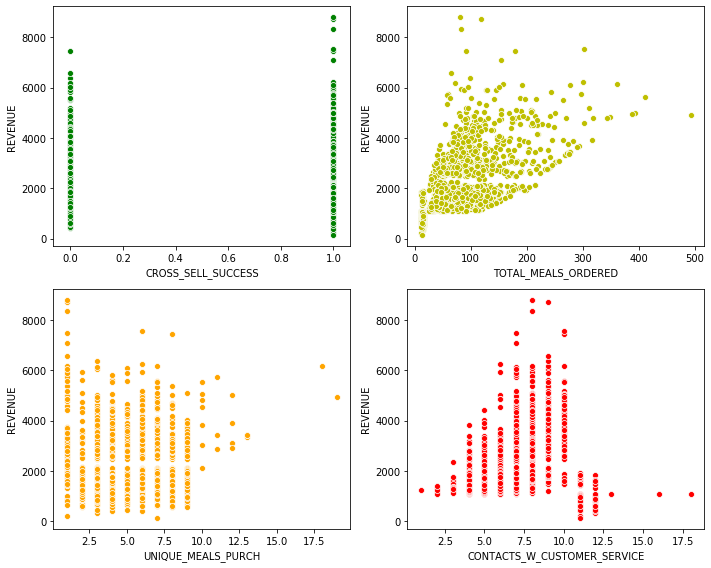

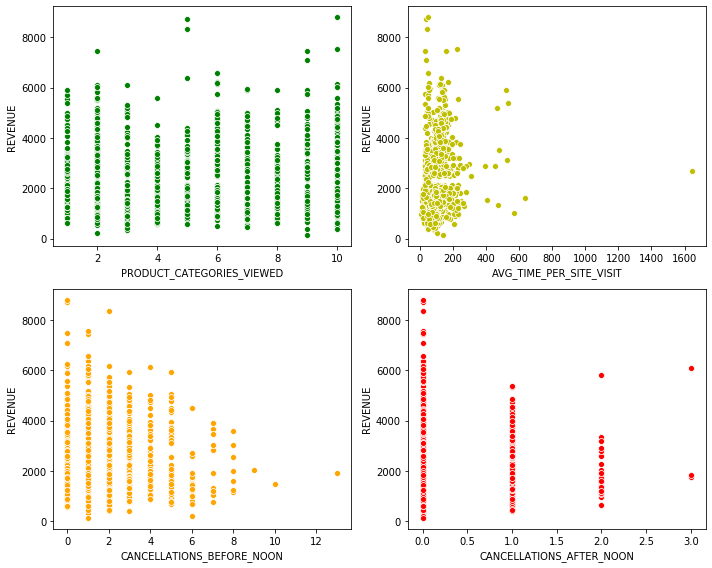

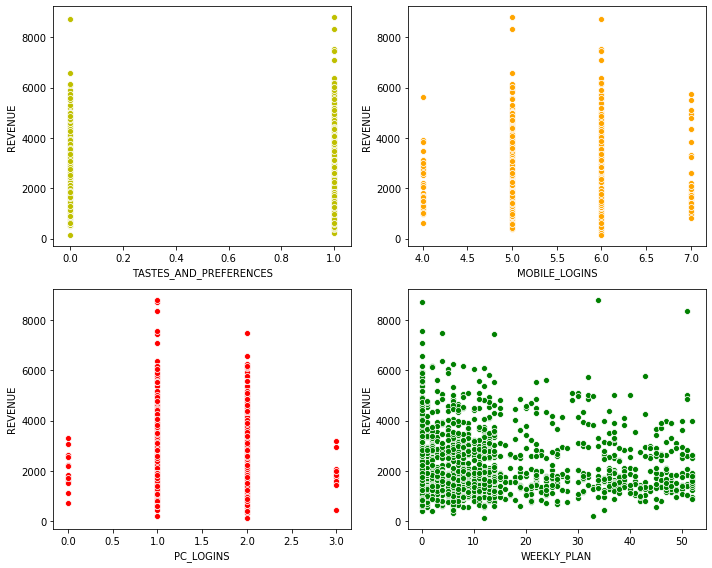

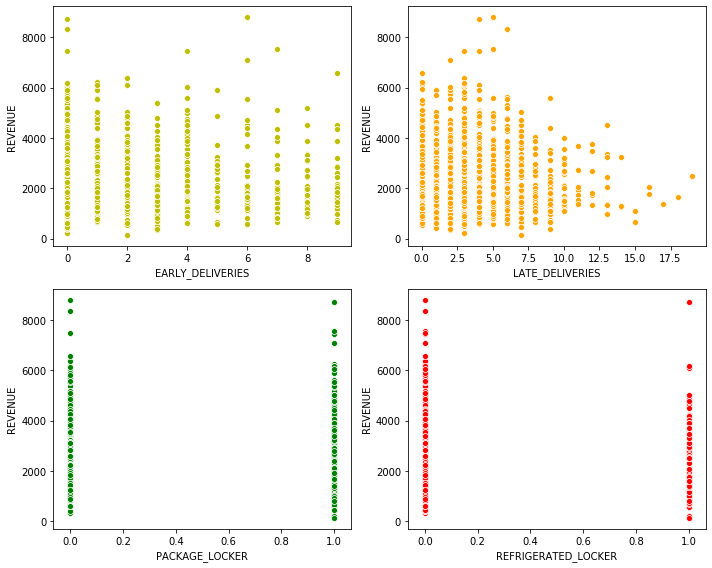

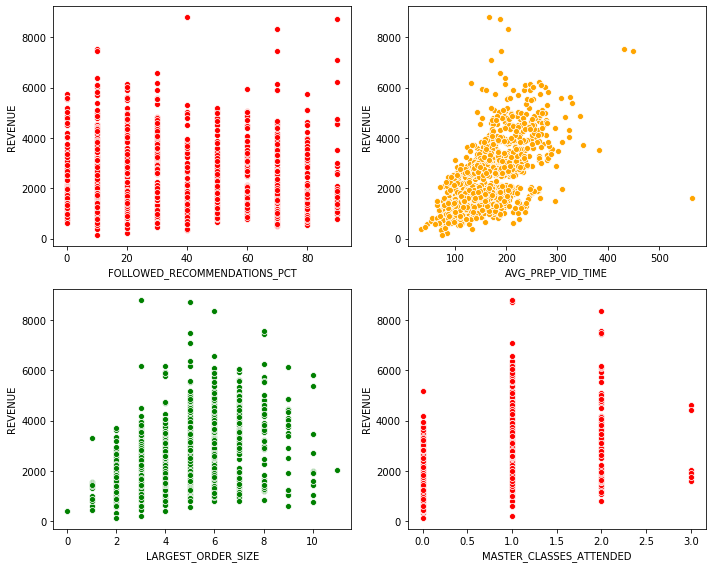

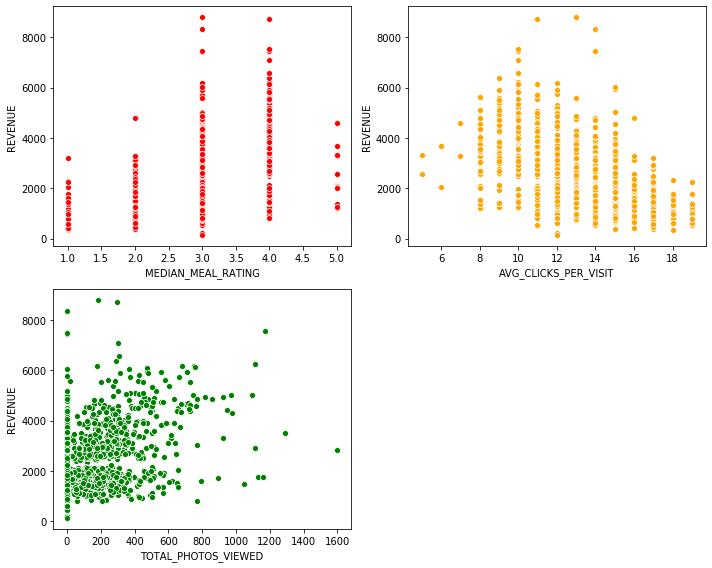

In [11]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CROSS_SELL_SUCCESS'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('chef Data Scatterplots 1 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')
plt.tight_layout()
plt.savefig('chef Data Scatterplots 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TASTES_AND_PREFERENCES'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('PC_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.savefig('chef Data Scatterplots 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('LATE_DELIVERIES')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PACKAGE_LOCKER'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['REFRIGERATED_LOCKER'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

plt.tight_layout()
plt.savefig('chef Data Scatterplots 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = chef['REVENUE'],
               color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')

plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

plt.tight_layout()
plt.savefig('chef Data Scatterplots 5 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

plt.tight_layout()
plt.savefig('chef Data Scatterplots 6 of 6.png')
plt.show()

In [12]:
#Total Meals Ordered Scatter
TOTAL_MEALS_ORDERED_scat_out = 300

chef['TOTAL_MEALS_ORDERED_scat_out'] = 0
TOTAL_MEALS_ORDERED_scat_condition_split = chef.loc[: , 'TOTAL_MEALS_ORDERED_scat_out'][chef['TOTAL_MEALS_ORDERED']>=TOTAL_MEALS_ORDERED_scat_out]
chef['TOTAL_MEALS_ORDERED_scat_out'].replace(to_replace = TOTAL_MEALS_ORDERED_scat_condition_split,
                            value = 1,
                           inplace = True)




#Latgest Order Size
LARGEST_ORDER_SIZE_scat_out = 10
chef['LARGEST_ORDER_SIZE_scat_out'] = 0

LARGEST_ORDER_SIZE_scat_out_scat_condition_split = chef.loc[: , 'LARGEST_ORDER_SIZE_scat_out'][chef['LARGEST_ORDER_SIZE']>=LARGEST_ORDER_SIZE_scat_out]
chef['LARGEST_ORDER_SIZE_scat_out'].replace(to_replace = LARGEST_ORDER_SIZE_scat_out_scat_condition_split,
                            value = 1,
                           inplace = True)



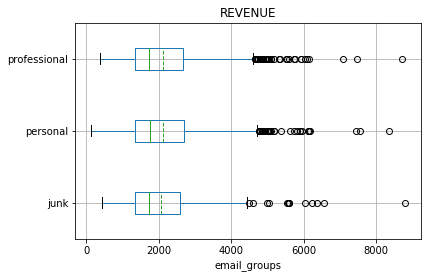

In [13]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function can be used for categorical variables

	PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    data.boxplot(column 	     = response,
    	            by 	 		 = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'email_groups',
					 data     = chef)

In [14]:
#marking outliers for the email group
email_group_out = 6000

chef['out_email_group'] = 0

out_email_group_condition_split = chef.loc[: , 'out_email_group'][chef['REVENUE']>email_group_out]
chef['out_email_group'].replace(to_replace = out_email_group_condition_split,
                            value = 1,
                           inplace = True)

chef.to_excel('chef_feature_rich.xlsx', index=False)

In [15]:
# one hot encoding categorical variables
one_hot_email  = pd.get_dummies(chef['email_groups'])

chef.head()

,Unnamed: 0,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,...,out_PACKAGE_LOCKER,out_AVG_PREP_VID_TIME,out_LARGEST_ORDER_SIZE,out_MASTER_CLASSES_ATTENDED,out_MEDIAN_MEAL_RATING,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,TOTAL_MEALS_ORDERED_scat_out,LARGEST_ORDER_SIZE_scat_out,out_email_group
0,0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,...,0,0,0,0,0,0,1,0,0,0
1,1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,...,0,0,0,0,0,0,0,0,0,0
2,2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,...,0,0,0,1,0,0,1,0,0,0
3,3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,...,0,0,0,0,0,0,1,0,0,0
4,4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with Revenue
print(df_corr.loc[:, 'REVENUE'].sort_values(ascending = False))

REVENUE                         1.00
out_revenue                     0.83
out_MASTER_CLASSES_ATTENDED     0.83
AVG_PREP_VID_TIME               0.64
MEDIAN_MEAL_RATING              0.61
TOTAL_MEALS_ORDERED             0.60
TOTAL_PHOTOS_VIEWED             0.47
MASTER_CLASSES_ATTENDED         0.45
LARGEST_ORDER_SIZE              0.44
out_email_group                 0.40
out_AVG_PREP_VID_TIME           0.37
out_meals_ordered               0.35
TOTAL_MEALS_ORDERED_scat_out    0.23
out_unique_meals                0.17
out_LARGEST_ORDER_SIZE          0.16
AVG_TIME_PER_SITE_VISIT         0.14
CONTACTS_W_CUSTOMER_SERVICE     0.10
out_WEEKLY_PLAN                 0.06
out_AVG_CLICKS_PER_VISIT        0.06
out_MEDIAN_MEAL_RATING          0.04
out_CANCELLATIONS_AFTER_NOON    0.03
MOBILE_NUMBER                   0.03
out_avg_time_site_visit         0.03
PRODUCT_CATEGORIES_VIEWED       0.03
LARGEST_ORDER_SIZE_scat_out     0.03
MOBILE_LOGINS                   0.02
out_MOBILE_LOGINS               0.02
W

In [16]:
for val in chef:
    print(f"chef['{val}'] + ")

chef['Unnamed: 0'] + 
chef['REVENUE'] + 
chef['CROSS_SELL_SUCCESS'] + 
chef['NAME'] + 
chef['EMAIL'] + 
chef['FIRST_NAME'] + 
chef['FAMILY_NAME'] + 
chef['TOTAL_MEALS_ORDERED'] + 
chef['UNIQUE_MEALS_PURCH'] + 
chef['CONTACTS_W_CUSTOMER_SERVICE'] + 
chef['PRODUCT_CATEGORIES_VIEWED'] + 
chef['AVG_TIME_PER_SITE_VISIT'] + 
chef['MOBILE_NUMBER'] + 
chef['CANCELLATIONS_BEFORE_NOON'] + 
chef['CANCELLATIONS_AFTER_NOON'] + 
chef['TASTES_AND_PREFERENCES'] + 
chef['MOBILE_LOGINS'] + 
chef['PC_LOGINS'] + 
chef['WEEKLY_PLAN'] + 
chef['EARLY_DELIVERIES'] + 
chef['LATE_DELIVERIES'] + 
chef['PACKAGE_LOCKER'] + 
chef['REFRIGERATED_LOCKER'] + 
chef['FOLLOWED_RECOMMENDATIONS_PCT'] + 
chef['AVG_PREP_VID_TIME'] + 
chef['LARGEST_ORDER_SIZE'] + 
chef['MASTER_CLASSES_ATTENDED'] + 
chef['MEDIAN_MEAL_RATING'] + 
chef['AVG_CLICKS_PER_VISIT'] + 
chef['TOTAL_PHOTOS_VIEWED'] + 
chef['personal_email_domain'] + 
chef['email_groups'] + 
chef['out_revenue'] + 
chef['out_meals_ordered'] + 
chef['out_unique_meals'] + 
ch

In [46]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """chef['REVENUE'] ~  
                                chef['TOTAL_MEALS_ORDERED'] + 
                                chef['UNIQUE_MEALS_PURCH'] + 
                                chef['CONTACTS_W_CUSTOMER_SERVICE'] + 
                                chef['CANCELLATIONS_BEFORE_NOON'] + 
                                chef['MOBILE_LOGINS'] + 
                                chef['AVG_PREP_VID_TIME'] + 
                                chef['LARGEST_ORDER_SIZE'] + 
                                chef['MASTER_CLASSES_ATTENDED'] + 
                                chef['MEDIAN_MEAL_RATING'] +
                                chef['out_revenue'] + 
                                chef['out_unique_meals'] + 
                                chef['out_customer_service_contact'] +
                                chef['out_canc_before_noon'] + 
                                chef['out_CANCELLATIONS_AFTER_NOON'] + 
                                chef['out_WEEKLY_PLAN'] + 
                                chef['out_AVG_PREP_VID_TIME'] + 
                                chef['out_MASTER_CLASSES_ATTENDED'] + 
                                chef['out_MEDIAN_MEAL_RATING'] + 
                                chef['out_email_group']""",
                                 data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        chef['REVENUE']   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     663.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:32:59   Log-Likelihood:                -14535.
No. Observations:                1946   AIC:                         2.911e+04
Df Residuals:                    1927   BIC:                         2.921e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               89.1506    114.109      0.781      0.435    -134.640     312.941
chef['TOTAL_MEALS_ORDERED']              2.1998      0.241      9.137      0.000       1.728       2.672
chef['UNIQUE_MEALS_PURCH']             -31.5520      4.107     -7.683      0.000     -39.606     -23.498
chef['CONTACTS_W_CUSTOMER_SERVICE']     63.0560      7.078      8.908      0.000      49.174      76.938
chef['CANCELLATIONS_BEFORE_NOON']       18.4669      7.426      2.487      0.013       3.904      33.030
chef['MOBILE_LOGINS']                   37.8276     16.689      2.267      0.024       5.097      70.558
chef['AVG_PREP_VID_TIME']                3.2192      0.437      7.370      0.000       2.363       4.076
chef['LARGEST_ORDER_SIZE']             -25.3961     10.712     -2.371      0.018     -46.404      -4.388
chef['MASTER_CLASSES_ATTENDED']         77.1978     17.666      4.370      0.000      42.552     111.844
chef['MEDIAN_MEAL_RATING']             176.8715     17.469     10.125      0.000     142.612     211.131
chef['out_revenue']                    648.5414     14.419     44.977      0.000     620.262     676.821
chef['out_unique_meals']               266.6822    109.610      2.433      0.015      51.715     481.649
chef['out_customer_service_contact']  -649.3038     56.967    -11.398      0.000    -761.028    -537.580
chef['out_canc_before_noon']          -209.2785     77.558     -2.698      0.007    -361.384     -57.173
chef['out_CANCELLATIONS_AFTER_NOON']    60.2748     29.670      2.032      0.042       2.087     118.463
chef['out_WEEKLY_PLAN']                 48.4460     19.568      2.476      0.013      10.069      86.823
chef['out_AVG_PREP_VID_TIME']          250.8618     61.090      4.106      0.000     131.053     370.671
chef['out_MASTER_CLASSES_ATTENDED']    648.5414     14.419     44.977      0.000     620.262     676.821
chef['out_MEDIAN_MEAL_RATING']        -572.7378    125.994     -4.546      0.000    -819.836    -325.639
chef['out_email_group']               2964.6507    106.770     27.767      0.000    2755.253    3174.048
==============================================================================
Omnibus:                      594.243   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3101.652
Skew:                           1.344   Prob(JB):                         0.00
Kurtosis:                       8.570   Cond. No.                     2.09e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-29. This might indicate that there are
strong multicol

In [18]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

In [47]:
# applying modelin scikit-learn

# preparing x-variables
chef_data = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
             'CANCELLATIONS_BEFORE_NOON', 'MOBILE_LOGINS', 
             'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
             'out_revenue', 'out_unique_meals', 'out_customer_service_contact', 'out_canc_before_noon', 
             'out_CANCELLATIONS_AFTER_NOON', 'out_WEEKLY_PLAN', 'out_AVG_PREP_VID_TIME','out_MASTER_CLASSES_ATTENDED', 
             'out_MEDIAN_MEAL_RATING', 'out_email_group']


# preparing response variable
chef_target = ['REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(chef[chef_data],
                                                    chef[chef_target],
                                                    test_size=0.25, 
                                                    random_state=222)

In [48]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score = lr.score(X_test, y_test).round(4)

Training Score: 0.8642
Testing Score: 0.8471


In [49]:
import sklearn.linear_model

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.8637
Testing Score: 0.8456


In [50]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.8639
Testing Score: 0.8442


In [51]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)


print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score:',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)

C:\python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.864
Testing Score: 0.8472


In [58]:
from sklearn.tree import DecisionTreeRegressor

# INSTANTIATING a model object
tree_model = sklearn.tree.DecisionTreeRegressor(max_depth=6, random_state=222)


# FITTING the training data
tree_fit = tree_model.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_fit.predict(X_test)


print('Training Score:', tree_model.score(X_train, y_train).round(3))
print('Testing Score:',  tree_model.score(X_test, y_test).round(3))


# saving scoring data for future use
tree_train_score = tree_model.score(X_train, y_train).round(3)
tree_test_score  = tree_model.score(X_test, y_test).round(3)

Training Score: 0.907
Testing Score: 0.869


In [53]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# INSTANTIATING a model object
rfr_model = sklearn.ensemble.RandomForestRegressor(n_estimators=90,
            random_state=222)


# FITTING the training data
rfr_fit = rfr_model.fit(X_train, y_train)


# PREDICTING on new data
rfr_pred = rfr_fit.predict(X_test)


print('Training Score:', rfr_model.score(X_train, y_train).round(4))
print('Testing Score:',  rfr_model.score(X_test, y_test).round(4))


# saving scoring data for future use
rfr_train_score = rfr_model.score(X_train, y_train).round(4)
rfr_test_score  = rfr_model.score(X_test, y_test).round(4)

C:\python\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Training Score: 0.9832
Testing Score: 0.9022


In [54]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# INSTANTIATING a model object
gbr_model = sklearn.ensemble.GradientBoostingRegressor(max_depth=4, 
                                                        n_estimators=200,
                                                        random_state=222)

# FITTING the training data
gbr_fit = gbr_model.fit(X_train, y_train)


# PREDICTING on new data
gbr_pred = gbr_fit.predict(X_test)


print('Training Score:', gbr_model.score(X_train, y_train).round(4))
print('Testing Score:',  gbr_model.score(X_test, y_test).round(4))


# saving scoring data for future use
gbr_train_score = gbr_model.score(X_train, y_train).round(4)
gbr_test_score  = gbr_model.score(X_test, y_test).round(4)




C:\python\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.9767
Testing Score: 0.9016


In [55]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}           {ridge_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
DTR        {tree_train_score}           {tree_test_score}
RFR        {rfr_train_score}           {rfr_test_score}
GBR        {gbr_train_score}           {gbr_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD', 'DTR', 'RFR', 'GBR'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, ard_train_score,
                                   tree_train_score, rfr_train_score,
                                   gbr_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, ard_test_score,
                                   tree_test_score, rfr_test_score,
                                   gbr_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('all_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.8642           0.8471
Ridge      0.8639           0.8442
Lasso      0.8637           0.8456
ARD        0.864           0.8472
DTR        0.907           0.869
RFR        0.9832           0.9022
GBR        0.9767           0.9016



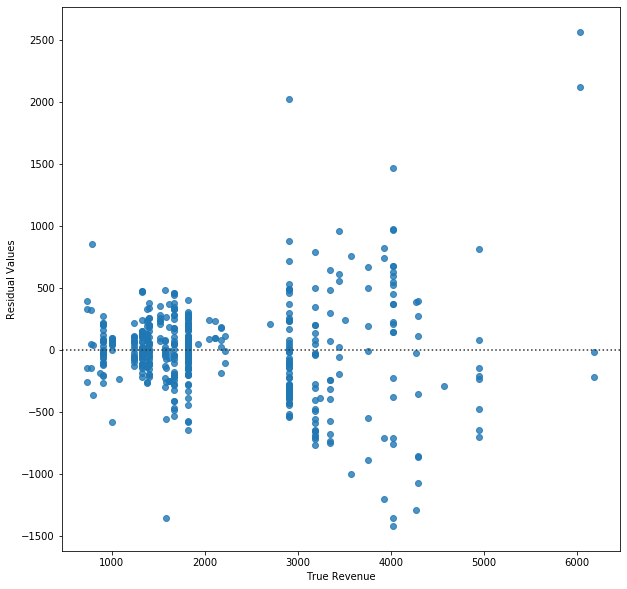

In [33]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 10))


# developing a residual plot
sns.residplot(x = tree_pred,  # prediction values
              y = y_test) # actual values


# saving figure in working directory
plt.xlabel('True Revenue')
plt.ylabel('Residual Values')

plt.savefig("Chef Residual Plot_ridgepred.png")


# displaying the plot
plt.show()